In [1]:
#Using ARIMA to forecast the future values 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the data from the XLSX file
data = pd.read_excel('dataset.xlsx')

# Preprocess the data
data['From Date'] = pd.to_datetime(data['From Date'])  # Convert the 'date' column to a datetime
data = data.set_index('From Date')  # Assuming 'date' is the column containing the date/time
data = data.sort_index()  # Sort by date/time

# Handle missing values (e.g., forward-filling)
data = data.ffill()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16020\1013920358.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['From Date'] = pd.to_datetime(data['From Date'])  # Convert the 'date' column to a datetime


In [2]:
# Use PM2.5 as the target variable
pollution_data = data['PM2.5']

# Fit ARIMA model
model = ARIMA(pollution_data, order=(5,1,0)) # Example order, you may need to adjust
model_fit = model.fit()

# Forecast the next seven days
forecast = model_fit.forecast(steps=7)

print("Forecasted pollution levels for the next seven days:")
print(forecast)

Forecasted pollution levels for the next seven days:
2024-02-21    84.526657
2024-02-22    84.965916
2024-02-23    85.748840
2024-02-24    85.518867
2024-02-25    84.542916
2024-02-26    84.477516
2024-02-27    84.703668
Freq: D, Name: predicted_mean, dtype: float64


c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                  732
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3761.273
Date:                Wed, 13 Mar 2024   AIC                           7534.547
Time:                        15:07:08   BIC                           7562.113
Sample:                    02-19-2022   HQIC                          7545.181
                         - 02-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2738      0.019    -14.220      0.000      -0.312      -0.236
ar.L2         -0.2858      0.025    -11.225      0.000      -0.336      -0.236
ar.L3         -0.1481      0.029     -5.103      0.0

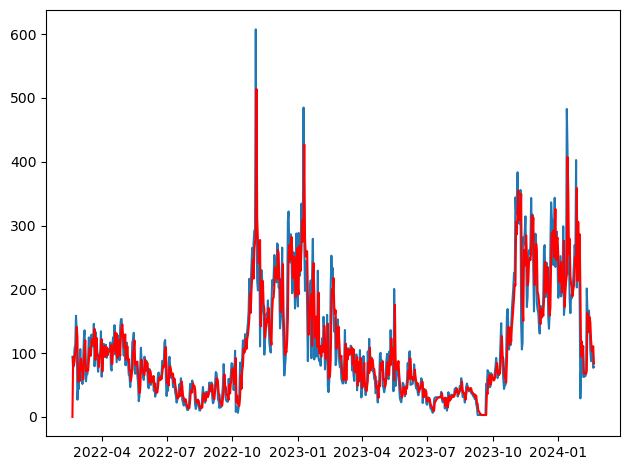

In [4]:
# Additional information

# Print the model summary
print(model_fit.summary())

# Plot the residuals

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt
plt.plot(pollution_data)
plt.plot(model_fit.fittedvalues, color='red')
plt.tight_layout()
plt.show()